This programming exercise is from the textbook [Think Complexity, 2nd edition](https://thinkcomplex.com) by Allen Downey. This book is distributed under the [MIT License](http://opensource.org/licenses/MIT).

Some computer code from the textbook were also reused and modified for the purposes of this exercise. These reused computer code are indicated in the solution for this exercise and are still credited to the author.

**Exercise:** This exercise asks you to experiment with Rule 110 and see how
many spaceships you can find.

1. Read the [Wikipedia page about Rule 110](https://en.wikipedia.org/wiki/Rule_110), which describes its background pattern and spaceships.

2. Create a Rule 110 CA with an initial condition that yields the
  stable background pattern.  Note that the CA class provides
`start_string`, which allow you to initialize the state of
the array using a string of `1`s and `0`s.

3. Modify the initial condition by adding different patterns in the
  center of the row and see which ones yield spaceships.  You might
  want to enumerate all possible patterns of $n$ bits, for some
  reasonable value of $n$.  For each spaceship, can you find the
  period and rate of translation?  What is the biggest spaceship you
  can find?

4. What happens when spaceships collide?

# Solution goes here

The following class is a modification of the `CA_1D` class given in the textbook. The modifications allow a different window to used, a seed to be given to the random generators, and the resulting plot is enlarged for easier viewing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

This defines the actual `CA_1D` class:

In [3]:
class CA_1D:
    """
    Creates a 1D Cellular Automaton
    """
    
    def __init__(self, rule, n, window = [4, 2, 1]):
        """
        This is the constructor of the class
        
        Initializes CA_1D with the following variables:
        
        rule:         Rule to follow (Integer between 0 and 256)
        n:            Number of trials
        m:            Number of samples
        window:       Window to use
        """
        
        self._table = np.unpackbits(np.array([rule], dtype = np.uint8))[::-1]
        self._n = n
        self._m = 2*n
        self._counter = 0
        self._window = window
        
        """Builds the array for the 1D CA experiment"""
        self._array = np.zeros((n, self._m), dtype=np.int8)
        
    def center_start(self):
        self._array[0, self._m // 2] = 1
        self._counter += 1
        
    def experiment(self, loops):
        for k in range(loops):
            c = np.correlate(self._array[self._counter-1], self._window, mode = 'same')
            self._array[self._counter] = self._table[c]
            self._counter += 1
            
    def plot_exp(self, start = 0, end = None):
        a = self._array[:, start:end]
        
        plt.figure(None, figsize=(20, 36), dpi = 200)                  # Changes figure size (in inches), increases dpi
        plt.imshow(a, cmap='Blues', interpolation = 'none')
        
        plt.xticks([])
        plt.yticks([])
    
    def random_start(self):
        self._array[0] = np.random.randint(2, size = self._m)
        self._counter += 1

The following code then generates the actual graph:

In [4]:
"""
This function draws the CA_1D with the specified initial conditions

If random mode is chosen and seed is not specified, returns a random configuration every time
"""


def ca_draw (rule, n, mode = 'random', seed = 0, window = [4, 2, 1]):
    ca = CA_1D(rule, n, window)
    
    if mode == 'random':
        if seed > 0:
            np.random.seed(seed)
            ca.random_start()
        else:
            ca.random_start()
            
    elif mode == 'center':
        ca.center_start()
        
    else:
        raise TypeError('No such mode')
        
    ca.experiment(n-1)                                     #Not choosing n-1 picks an index bigger than the array!
    
    return ca.plot_exp()                                   #Look at plot_exp to change the size of the figure

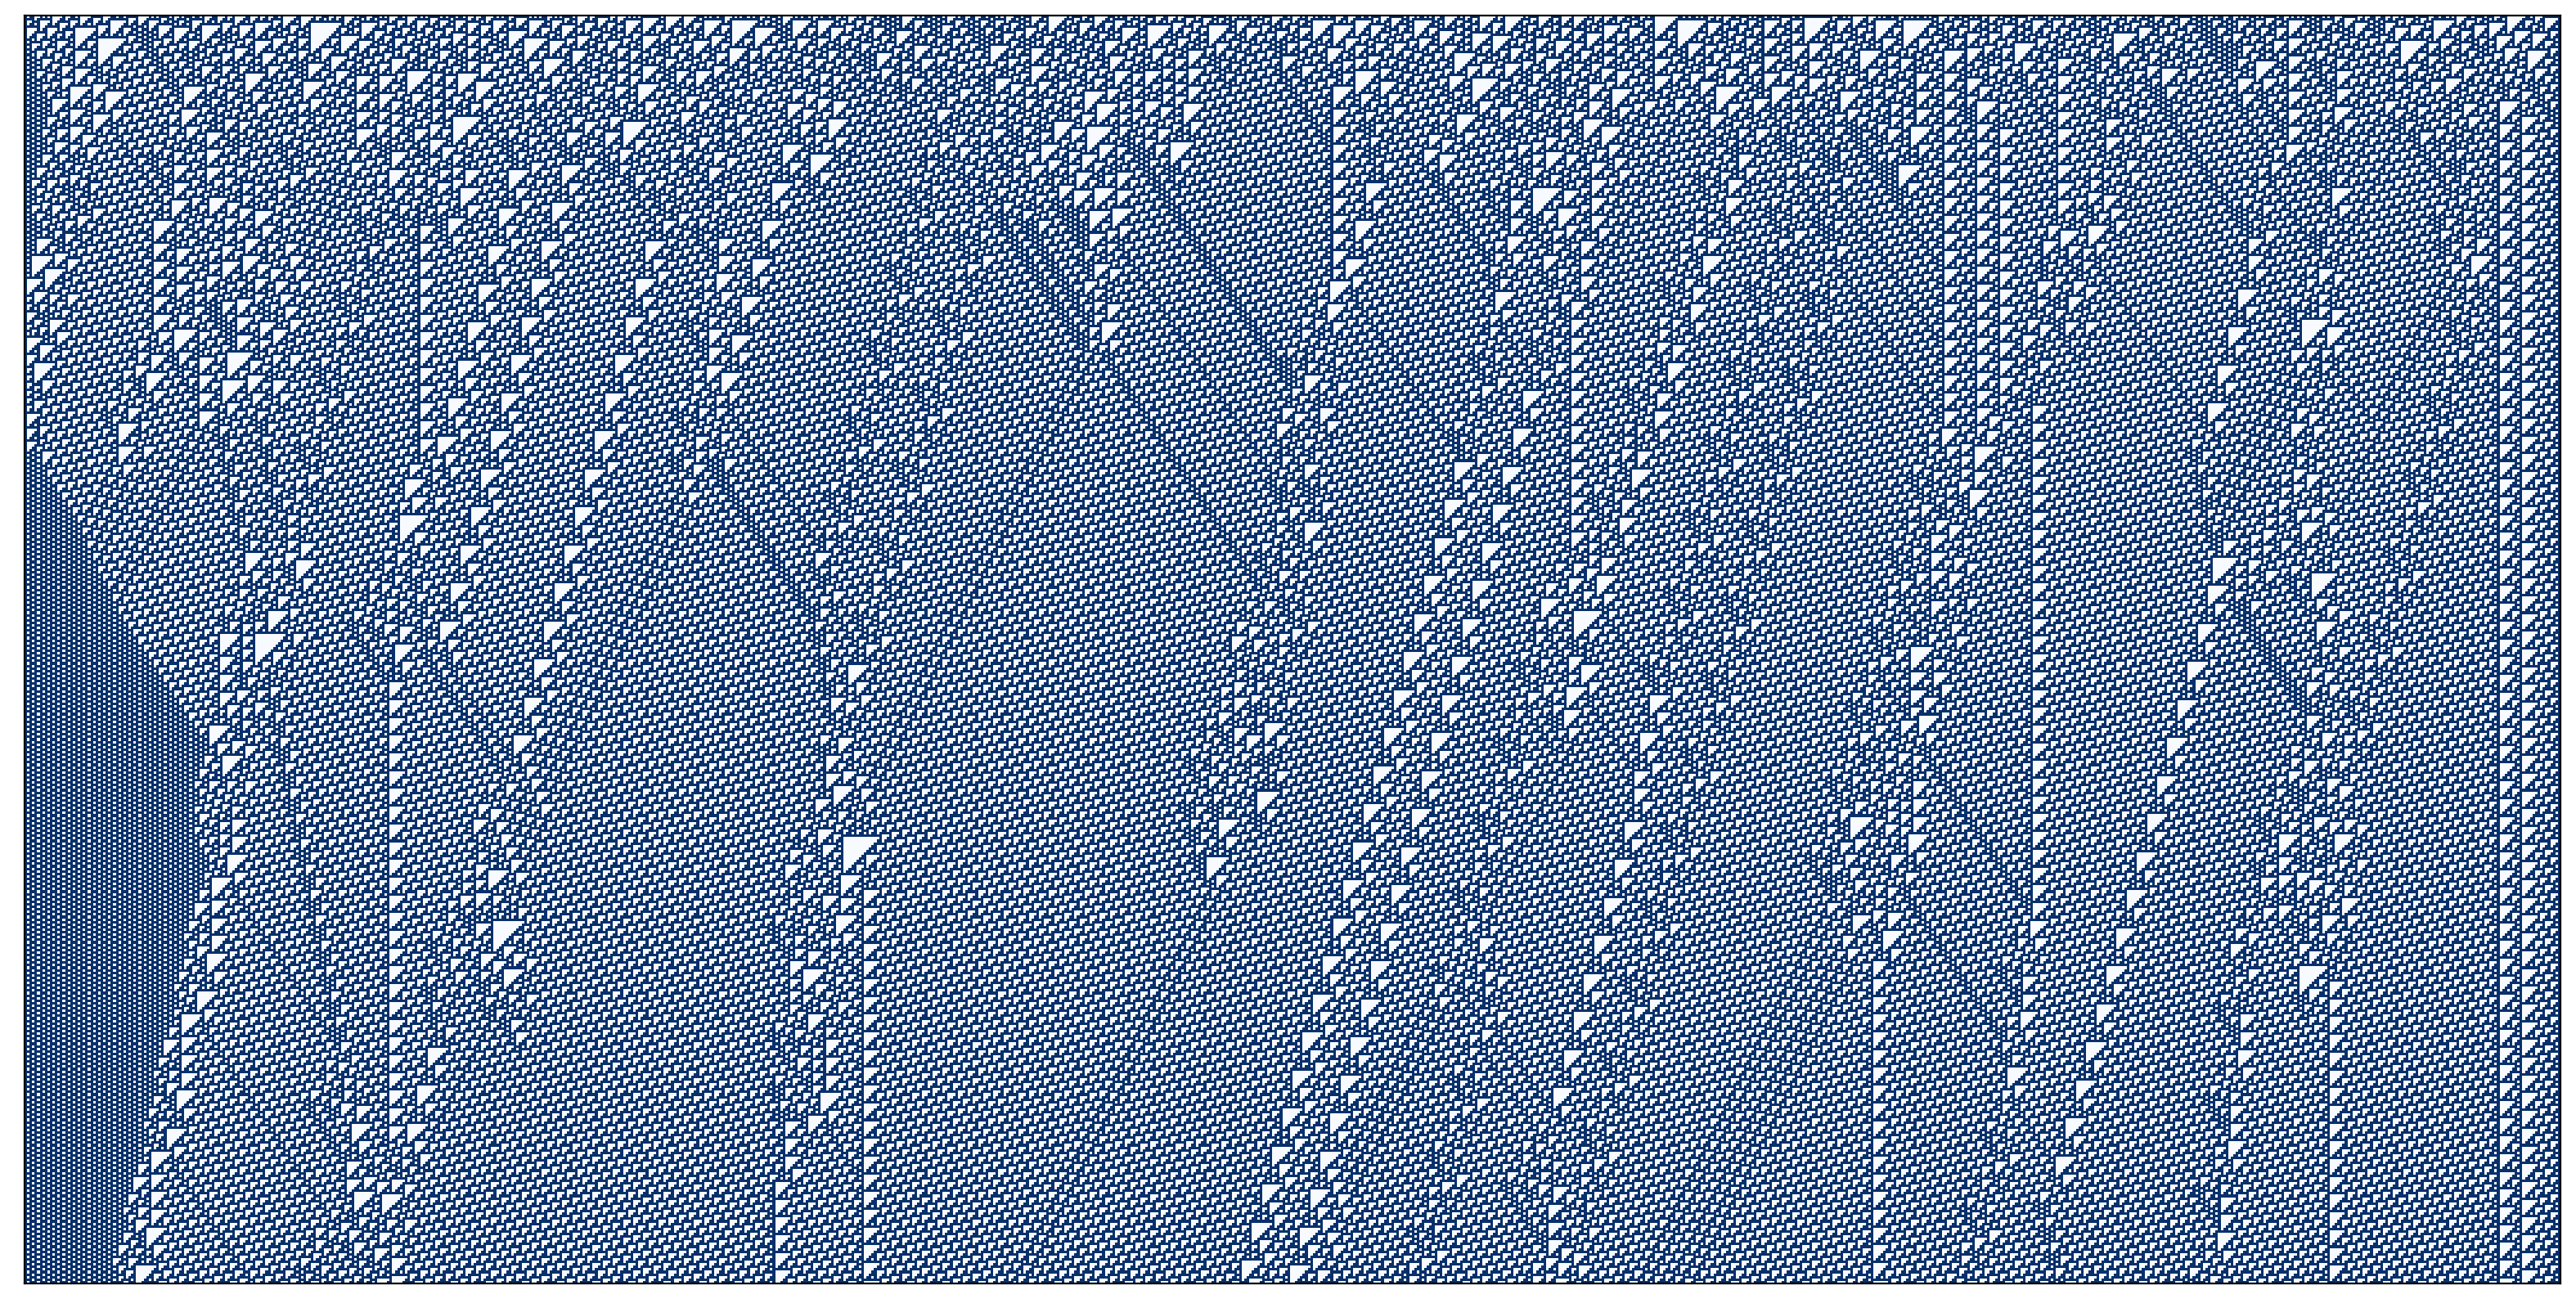

In [5]:
ca_draw(110, 500, 'random', 20)

This features the three primary spaceships in Rule 110 and the infinite background pattern (the three primary spaceships are listed in https://en.wikipedia.org/wiki/Rule_110). Notable however is the presence of a secondary background pattern at the left of the image. This is similar in look to the first primary spaceship. Two other prominent spaceships here can be seen at the middle and bottom of the image where the structure shifts three cells to the left or to the right. The biggest example of this is the one at the middle right where the spaceship moves to the right until it collides with another spaceship. The biggest spaceship however is at the right of the image, this spaceship moves from the top to the bottom of the plot.

Most of the collisions shown here each form a different spaceship, the notable exception however is when a spaceship collides with the third primary spaceship. When this happens, the first spaceship vanishes while the third primary spaceship continues downward.